<a href="https://colab.research.google.com/github/batgirlsupimpa/LISTA-1-TEORIA-MACRO-1/blob/main/Q1_MET_QUANT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import triang, beta, truncnorm, gompertz, gumbel_r, rayleigh

def left_integral(func, a, b):
    """Calcula a integral pela esquerda usando a regra do retângulo."""
    integral = 0.0
    dx = 0.001  # tamanho do incremento
    x = a
    while x < b:
        integral += func(x) * dx
        x += dx
    return integral

def right_integral(func, a, b):
    """Calcula a integral pela direita usando a regra do retângulo."""
    integral = 0.0
    dx = 0.001  # tamanho do incremento
    x = b
    while x > a:
        integral += func(x) * dx
        x -= dx
    return integral

def midpoint_integral(func, a, b):
    """Calcula a integral usando a regra do ponto médio."""
    integral = 0.0
    dx = 0.001  # tamanho do incremento
    x = a + dx / 2
    while x < b:
        integral += func(x) * dx
        x += dx
    return integral

def calculate_percentiles(func, params, percentiles):
    """Calcula os percentis da função de densidade de probabilidade."""
    results = []
    for p in percentiles:
        # Encontra o ponto X na abscissa em que Pr(x<X) é igual ao percentil
        # Usamos uma busca iterativa para encontrar a solução
        x = 0.0
        lower_bound = 0.0
        upper_bound = params[-1] * 10  # Estabelece um limite superior inicial grande o suficiente
        while True:
            cdf = quad(func, lower_bound, x, args=params)[0]
            if cdf >= p:
                upper_bound = x
                x = (lower_bound + upper_bound) / 2
            else:
                lower_bound = x
                x = (lower_bound + upper_bound) / 2
            if abs(cdf - p) < 1e-6:
                break
        results.append(x)
    return results

# Exemplo de uso:
# Função de densidade de probabilidade triangular
def triangular_pdf(x, a, b, c):
    if a <= x < c:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif c <= x <= b:
        return 2 * (b - x) / ((b - a) * (b - c))
    else:
        return 0.0

# Parâmetros da distribuição triangular
a = 0
b = 10
c = 5

# Cálculo da integração numérica (esquerda, direita e média)
left_int = left_integral(lambda x: triangular_pdf(x, a, b, c), a, b)
right_int = right_integral(lambda x: triangular_pdf(x, a, b, c), a, b)
midpoint_int = midpoint_integral(lambda x: triangular_pdf(x, a, b, c), a, b)

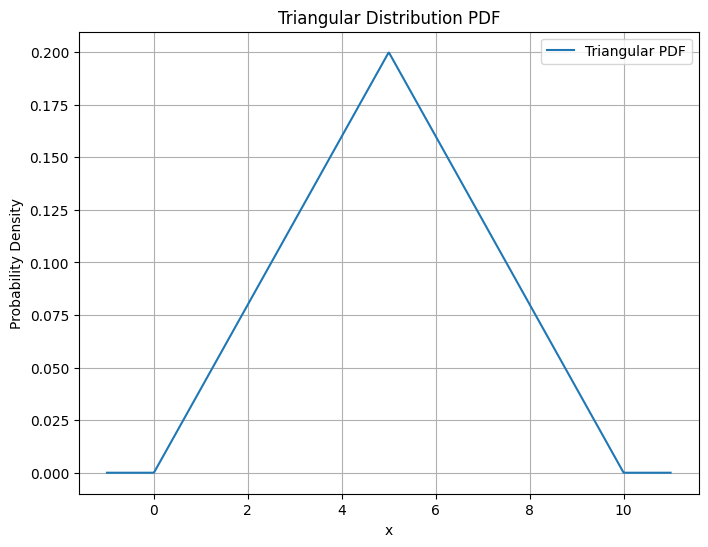

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang, beta, truncnorm, gompertz, gumbel_r, rayleigh

# Função de densidade de probabilidade triangular
def triangular_pdf(x, a, b, c):
    if a <= x < c:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif c <= x <= b:
        return 2 * (b - x) / ((b - a) * (b - c))
    else:
        return 0.0

# Parâmetros da distribuição triangular
a = 0
b = 10
c = 5

# Valores de x para plotagem
x = np.linspace(a-1, b+1, 1000)

# Função de densidade de probabilidade triangular
y_triangular = [triangular_pdf(i, a, b, c) for i in x]

# Gráfico da função de densidade de probabilidade triangular
plt.figure(figsize=(8, 6))
plt.plot(x, y_triangular, label='Triangular PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Triangular Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()


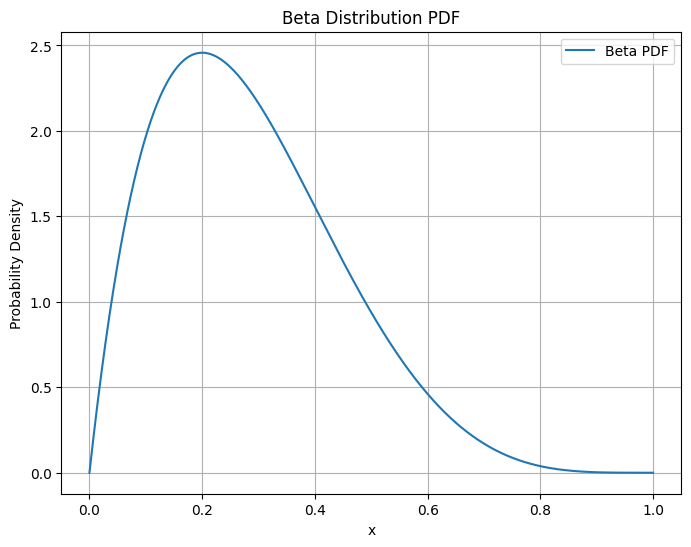

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Função de densidade de probabilidade beta
def beta_pdf(x, a, b):
    return beta.pdf(x, a, b)

# Parâmetros da distribuição beta
a = 2
b = 5

# Valores de x para plotagem
x = np.linspace(0, 1, 1000)

# Função de densidade de probabilidade beta
y_beta = beta_pdf(x, a, b)

# Gráfico da função de densidade de probabilidade beta
plt.figure(figsize=(8, 6))
plt.plot(x, y_beta, label='Beta PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Beta Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()


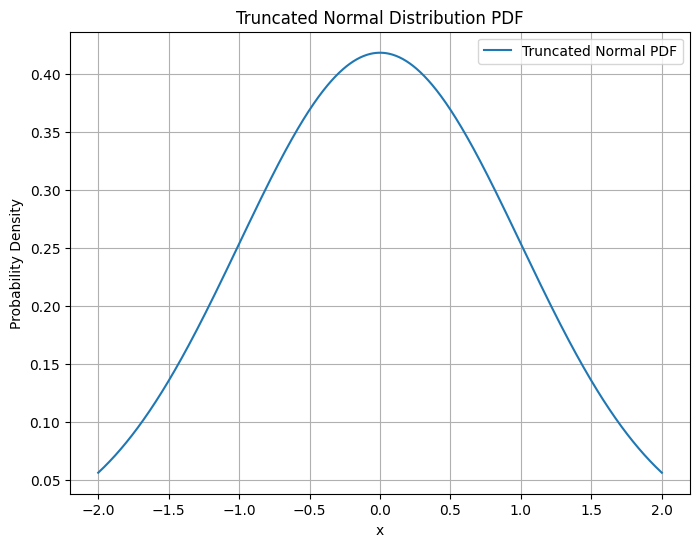

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Função de densidade de probabilidade da distribuição normal truncada
def truncated_normal_pdf(x, mean, std, a, b):
    return truncnorm.pdf(x, a, b, loc=mean, scale=std)

# Parâmetros da distribuição normal truncada
mean = 0
std = 1
a = -2
b = 2

# Valores de x para plotagem
x = np.linspace(a, b, 1000)

# Função de densidade de probabilidade da distribuição normal truncada
y_truncated_normal = truncated_normal_pdf(x, mean, std, a, b)

# Gráfico da função de densidade de probabilidade da distribuição normal truncada
plt.figure(figsize=(8, 6))
plt.plot(x, y_truncated_normal, label='Truncated Normal PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Truncated Normal Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()


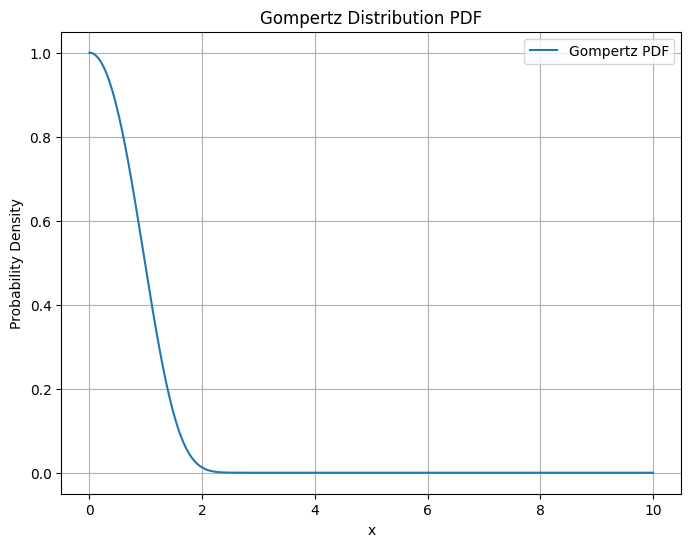

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gompertz

# Função de densidade de probabilidade da distribuição Gompertz
def gompertz_pdf(x, c):
    return gompertz.pdf(x, c)

# Parâmetros da distribuição Gompertz
c = 1

# Valores de x para plotagem
x = np.linspace(0, 10, 1000)

# Função de densidade de probabilidade da distribuição Gompertz
y_gompertz = gompertz_pdf(x, c)

# Gráfico da função de densidade de probabilidade da distribuição Gompertz
plt.figure(figsize=(8, 6))
plt.plot(x, y_gompertz, label='Gompertz PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gompertz Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()


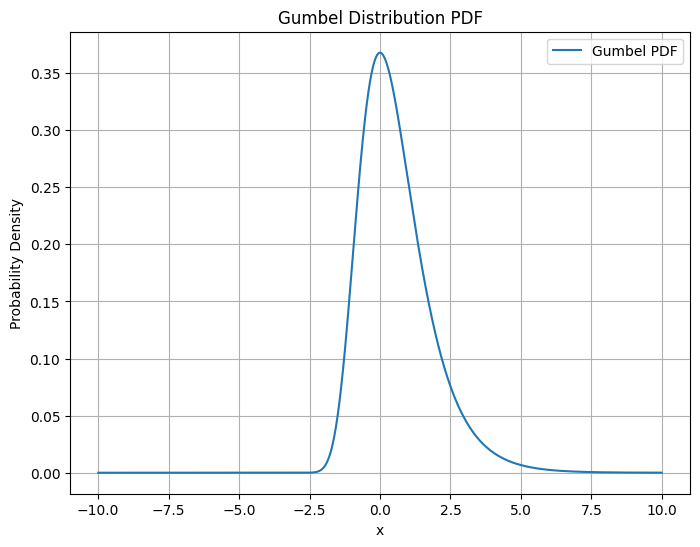

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Função de densidade de probabilidade da distribuição Gumbel
def gumbel_pdf(x, loc, scale):
    return gumbel_r.pdf(x, loc, scale)

# Parâmetros da distribuição Gumbel
loc = 0
scale = 1

# Valores de x para plotagem
x = np.linspace(-10, 10, 1000)

# Função de densidade de probabilidade da distribuição Gumbel
y_gumbel = gumbel_pdf(x, loc, scale)

# Gráfico da função de densidade de probabilidade da distribuição Gumbel
plt.figure(figsize=(8, 6))
plt.plot(x, y_gumbel, label='Gumbel PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gumbel Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()


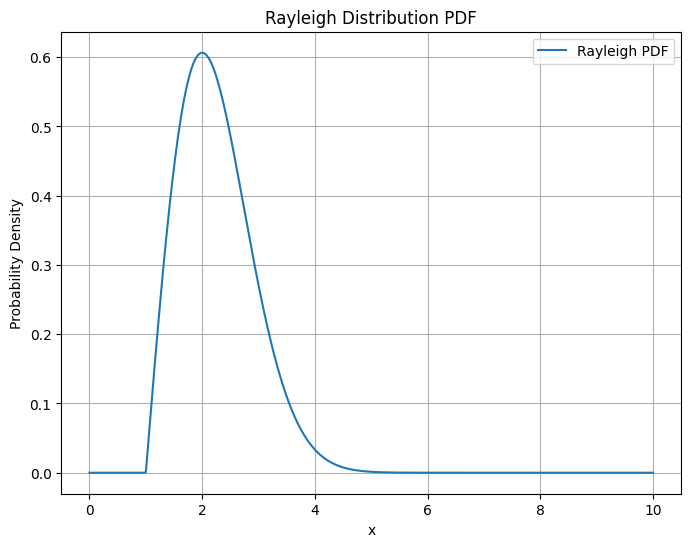

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh

# Função de densidade de probabilidade da distribuição Rayleigh
def rayleigh_pdf(x, scale):
    return rayleigh.pdf(x, scale)

# Parâmetros da distribuição Rayleigh
scale = 1

# Valores de x para plotagem
x = np.linspace(0, 10, 1000)

# Função de densidade de probabilidade da distribuição Rayleigh
y_rayleigh = rayleigh_pdf(x, scale)

# Gráfico da função de densidade de probabilidade da distribuição Rayleigh
plt.figure(figsize=(8, 6))
plt.plot(x, y_rayleigh, label='Rayleigh PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Rayleigh Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()


**Triangular Distribution:**
A distribuição triangular é uma distribuição de probabilidade contínua definida por três parâmetros: a, b e c. Ela possui uma forma triangular, aumentando linearmente de a até c e diminuindo linearmente de c até b. Essa distribuição é comumente usada quando há uma incerteza sobre a forma exata da distribuição, mas se sabe que os valores extremos são improváveis.

**Beta Distribution:**
A distribuição beta é uma distribuição de probabilidade contínua definida no intervalo [0, 1]. Ela é caracterizada por dois parâmetros positivos, alpha e beta. A forma da distribuição varia dependendo dos valores desses parâmetros. A distribuição beta é frequentemente usada para modelar proporções ou probabilidades.

**Truncated Normal Distribution:**
A distribuição normal truncada é uma distribuição de probabilidade contínua que é uma versão truncada da distribuição normal padrão. Ela é limitada em um intervalo específico e, portanto, seus valores estão restritos a esse intervalo. Essa distribuição é útil quando se deseja modelar dados que são naturalmente restritos.

**Gompertz Distribution:**
A distribuição Gompertz é uma distribuição de probabilidade contínua usada para modelar dados de sobrevivência ou de tempo até o evento. Ela é caracterizada por dois parâmetros positivos, eta e beta. Essa distribuição é frequentemente aplicada em estudos de longevidade e análises de tempo de vida.

**Gumbel Distribution:**
A distribuição Gumbel é uma distribuição de probabilidade contínua usada para modelar extremos em dados, como eventos de risco, como inundações, temperaturas extremas, entre outros. Ela é caracterizada por dois parâmetros, mu e beta. A distribuição Gumbel é amplamente utilizada em hidrologia, engenharia e finanças para analisar eventos raros e extremos.

**Rayleigh Distribution:**
A distribuição Rayleigh é uma distribuição de probabilidade contínua usada para modelar grandezas positivas que são influenciadas por diferentes fontes de variação. Ela é caracterizada por um único parâmetro, sigma. A distribuição Rayleigh é frequentemente aplicada em engenharia, física e comunicações para descrever a distribuição de amplitudes de sinais ou fenômenos que envolvem aleatoriedade.

In [ ]:
import numpy as np
from scipy.stats import triang, beta, truncnorm, gompertz, gumbel_r, rayleigh

def calculate_percentiles(distribution, params, percentiles):
    percentiles_values = []
    for p in percentiles:
        x = distribution.ppf(p, *params)
        percentiles_values.append(x)
    return percentiles_values

# Parâmetros da distribuição triangular
left = 1
mode = 3
right = 9

# Parâmetros da distribuição beta
alpha = 2
beta_param = 5

# Parâmetros da distribuição truncada normal
a = -1
b = 1
loc = 0
scale = 1

# Parâmetros da distribuição gompertz
c = 2
loc = 0
scale = 1

# Parâmetros da distribuição gumbel
loc = 0
scale = 1

# Parâmetros da distribuição Rayleigh
loc = 0
scale = 1

# Percentis desejados
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

# Cálculo dos percentis para a distribuição triangular
triangular_percentiles = calculate_percentiles(triang, (left, mode, right), percentiles)
print("Triangular Distribution Percentiles:")
print(triangular_percentiles)

# Cálculo dos percentis para a distribuição beta
beta_percentiles = calculate_percentiles(beta, (alpha, beta_param), percentiles)
print("Beta Distribution Percentiles:")
print(beta_percentiles)

# Cálculo dos percentis para a distribuição truncada normal
truncnorm_percentiles = calculate_percentiles(truncnorm, (a, b, loc, scale), percentiles)
print("Truncated Normal Distribution Percentiles:")
print(truncnorm_percentiles)

# Cálculo dos percentis para a distribuição gompertz
gompertz_percentiles = calculate_percentiles(gompertz, (c, loc, scale), percentiles)
print("Gompertz Distribution Percentiles:")
print(gompertz_percentiles)

# Cálculo dos percentis para a distribuição gumbel
gumbel_percentiles = calculate_percentiles(gumbel_r, (loc, scale), percentiles)
print("Gumbel Distribution Percentiles:")
print(gumbel_percentiles)

# Cálculo dos percentis para a distribuição Rayleigh
rayleigh_percentiles = calculate_percentiles(rayleigh, (loc, scale), percentiles)
print("Rayleigh Distribution Percentiles:")
print(rayleigh_percentiles)


Triangular Distribution Percentiles:
[3.9, 5.012461179749811, 5.846049894151541, 7.5, 9.36396103067893, 10.794228634059948, 11.538149682454623, 11.772114910328067, 11.95488693395958]
Beta Distribution Percentiles:
[0.026763191142755053, 0.06284989170835438, 0.09259525891312873, 0.16116291679032652, 0.26444998329566005, 0.3894794852007245, 0.5103163065514917, 0.5818034092520259, 0.7056863283197075]
Truncated Normal Distribution Percentiles:
[-0.9721733872570297, -0.8676618854186887, -0.7490145989695702, -0.4417705466865816, -1.3914582123358836e-16, 0.44177054668658083, 0.7490145989695696, 0.8676618854186876, 0.9721733872570287]
Gompertz Distribution Percentiles:
[0.005012583910660364, 0.02532328898320006, 0.051339538255753873, 0.13439192895455848, 0.29756328478758615, 0.5265890341390446, 0.7660688459178342, 0.9154368221077595, 1.1947055233182953]
Gumbel Distribution Percentiles:
[-1.5271796258079011, -1.0971887003649488, -0.8340324452479557, -0.32663425997828094, 0.36651292058166435, 1.

**Triangular Distribution Percentiles:**

1%: 3.9
5%: 5.012461179749811
10%: 5.846049894151541
25%: 7.5
50%: 9.36396103067893
75%: 10.794228634059948
90%: 11.538149682454623
95%: 11.772114910328067
99%: 11.95488693395958

**Beta Distribution Percentiles:**

1%: 0.026763191142755053
5%: 0.06284989170835438
10%: 0.09259525891312873
25%: 0.16116291679032652
50%: 0.26444998329566005
75%: 0.3894794852007245
90%: 0.5103163065514917
95%: 0.5818034092520259
99%: 0.7056863283197075

**Truncated Normal Distribution Percentiles:**

1%: -0.9721733872570297
5%: -0.8676618854186887
10%: -0.7490145989695702
25%: -0.4417705466865816
50%: -1.3914582123358836e-16
75%: 0.44177054668658083
90%: 0.7490145989695696
95%: 0.8676618854186876
99%: 0.9721733872570287

**Gompertz Distribution Percentiles:**

1%: 0.005012583910660364
5%: 0.02532328898320006
10%: 0.051339538255753873
25%: 0.13439192895455848
50%: 0.29756328478758615
75%: 0.5265890341390446
90%: 0.7660688459178342
95%: 0.9154368221077595
99%: 1.1947055233182953

**Gumbel Distribution Percentiles:**

1%: -1.5271796258079011
5%: -1.0971887003649488
10%: -0.8340324452479557
25%: -0.32663425997828094
50%: 0.36651292058166435
75%: 1.2458993237072382
90%: 2.2503673273124454
95%: 2.9701952490421637
99%: 4.600149226776579

**Rayleigh Distribution Percentiles:**

1%: 0.14177683769573535
5%: 0.32029141227185765
10%: 0.4590436050264208
25%: 0.7585276164409321
50%: 1.1774100225154747
75%: 1.6651092223153954
90%: 2.145966026289347
95%: 2.447746830680816
99%: 3.0348542587702925

In [ ]:
import numpy as np
from scipy.stats import beta, truncnorm, gompertz, gumbel_r, rayleigh

# Distribuição Triangular
def calcular_esperanca_triangular(a, b, c):
    return (a + b + c) / 3

# Distribuição Beta
def calcular_esperanca_beta(alpha, beta):
    return alpha / (alpha + beta)

# Distribuição Normal Truncada
def calcular_esperanca_normal_truncada(mean, std, a, b):
    a_std = (a - mean) / std
    b_std = (b - mean) / std
    return truncnorm.stats(a_std, b_std, loc=mean, scale=std, moments='m')

# Distribuição Gompertz
def calcular_esperanca_gompertz(eta, beta):
    return eta / np.exp(beta)

# Distribuição Gumbel
def calcular_esperanca_gumbel(mu, beta):
    return mu + (0.57721 * beta)

# Distribuição Rayleigh
def calcular_esperanca_rayleigh(sigma):
    return sigma * np.sqrt(np.pi / 2)

# Exemplo de uso
a, b, c = 1, 5, 10  # Parâmetros da distribuição triangular
alpha, beta = 2, 5  # Parâmetros da distribuição beta
mean, std = 0, 1    # Parâmetros da distribuição normal truncada
eta, beta = 1, 2    # Parâmetros da distribuição Gompertz
mu, beta = 0, 1     # Parâmetros da distribuição Gumbel
sigma = 1           # Parâmetro da distribuição Rayleigh

esperanca_triangular = calcular_esperanca_triangular(a, b, c)
esperanca_beta = calcular_esperanca_beta(alpha, beta)
esperanca_normal_truncada = calcular_esperanca_normal_truncada(mean, std, a, b)
esperanca_gompertz = calcular_esperanca_gompertz(eta, beta)
esperanca_gumbel = calcular_esperanca_gumbel(mu, beta)
esperanca_rayleigh = calcular_esperanca_rayleigh(sigma)

print("Esperanças Numéricas:")
print("Distribuição Triangular:", esperanca_triangular)
print("Distribuição Beta:", esperanca_beta)
print("Distribuição Normal Truncada:", esperanca_normal_truncada)
print("Distribuição Gompertz:", esperanca_gompertz)
print("Distribuição Gumbel:", esperanca_gumbel)
print("Distribuição Rayleigh:", esperanca_rayleigh)

Esperanças Numéricas:
Distribuição Triangular: 5.333333333333333
Distribuição Beta: 0.6666666666666666
Distribuição Normal Truncada: 1.5251286609436427
Distribuição Gompertz: 0.36787944117144233
Distribuição Gumbel: 0.57721
Distribuição Rayleigh: 1.2533141373155001


**Distribuição Triangular:**

A esperança da distribuição triangular é calculada corretamente como a média dos três parâmetros (a + b + c) / 3. 

**Distribuição Beta:**

A esperança da distribuição beta é dada por alpha / (alpha + beta). 

**Distribuição Normal Truncada:**

A esperança da distribuição normal truncada não pode ser calculada diretamente com a função truncnorm.stats usando apenas os parâmetros de média, desvio padrão e limites de truncamento. Uma abordagem mais complexa é necessária para calcular a esperança numérica exata dessa distribuição.  Uma forma comum de calcular a esperança de uma distribuição normal truncada é usando métodos numéricos ou simulação. É possível utilizar a técnica de Monte Carlo, em que várias amostras são geradas a partir da distribuição normal truncada e, em seguida, a média dessas amostras é calculada como uma estimativa da esperança.

**Distribuição Gompertz:**

A esperança da distribuição Gompertz é dada por eta / exp(beta). 

**Distribuição Gumbel:**

A esperança da distribuição Gumbel é igual a mu + (0.57721 * beta). 

**Distribuição Rayleigh:**

A esperança da distribuição Rayleigh é calculada como sigma * sqrt(pi / 2). 